In [ ]:
%matplotlib inline


# Constrained Layout Guide


How to use constrained-layout to fit plots within your figure cleanly.

*constrained_layout* automatically adjusts subplots and decorations like
legends and colorbars so that they fit in the figure window while still
preserving, as best they can, the logical layout requested by the user.

*constrained_layout* is similar to
:doc:`tight_layout</tutorials/intermediate/tight_layout_guide>`,
but uses a constraint solver to determine the size of axes that allows
them to fit.

*constrained_layout* needs to be activated before any axes are added to
a figure. Two ways of doing so are

* using the respective argument to :func:`~.pyplot.subplots` or
  :func:`~.pyplot.figure`, e.g.::

      plt.subplots(constrained_layout=True)

* activate it via `rcParams<matplotlib-rcparams>`, like::

      plt.rcParams['figure.constrained_layout.use'] = True

Those are described in detail throughout the following sections.

<div class="alert alert-danger"><h4>Warning</h4><p>Currently Constrained Layout is **experimental**.  The
    behaviour and API are subject to change, or the whole functionality
    may be removed without a deprecation period.  If you *require* your
    plots to be absolutely reproducible, get the Axes positions after
    running Constrained Layout and use ``ax.set_position()`` in your code
    with ``constrained_layout=False``.</p></div>

Simple Example
==============

In Matplotlib, the location of axes (including subplots) are specified in
normalized figure coordinates. It can happen that your axis labels or
titles (or sometimes even ticklabels) go outside the figure area, and are thus
clipped.


In [1]:
# sphinx_gallery_thumbnail_number = 18


import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import numpy as np


plt.rcParams['savefig.facecolor'] = "0.8"
plt.rcParams['figure.figsize'] = 4.5, 4.


def example_plot(ax, fontsize=12, nodec=False):
    ax.plot([1, 2])

    ax.locator_params(nbins=3)
    if not nodec:
        ax.set_xlabel('x-label', fontsize=fontsize)
        ax.set_ylabel('y-label', fontsize=fontsize)
        ax.set_title('Title', fontsize=fontsize)
    else:
        ax.set_xticklabels('')
        ax.set_yticklabels('')


fig, ax = plt.subplots(constrained_layout=False)
example_plot(ax, fontsize=24)

To prevent this, the location of axes needs to be adjusted. For
subplots, this can be done by adjusting the subplot params
(`howto-subplots-adjust`). However, specifying your figure with the
``constrained_layout=True`` kwarg will do the adjusting automatically.



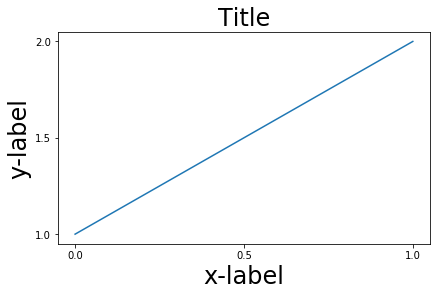

In [2]:
fig, ax = plt.subplots(constrained_layout=True)
example_plot(ax, fontsize=24)

When you have multiple subplots, often you see labels of different
axes overlapping each other.



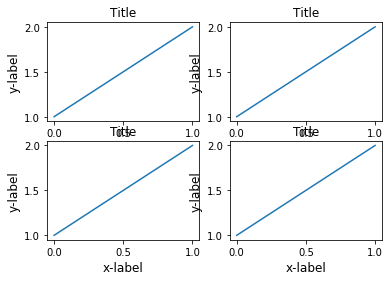

In [3]:
fig, axs = plt.subplots(2, 2, constrained_layout=False)
for ax in axs.flat:
    example_plot(ax)

Specifying ``constrained_layout=True`` in the call to ``plt.subplots``
causes the layout to be properly constrained.



In [ ]:
fig, axs = plt.subplots(2, 2, constrained_layout=True)
for ax in axs.flat:
    example_plot(ax)

Colorbars
=========

If you create a colorbar with the :func:`~matplotlib.pyplot.colorbar`
command you need to make room for it.  ``constrained_layout`` does this
automatically.  Note that if you specify ``use_gridspec=True`` it will be
ignored because this option is made for improving the layout via
``tight_layout``.

<div class="alert alert-info"><h4>Note</h4><p>For the `~.axes.Axes.pcolormesh` kwargs (``pc_kwargs``) we use a
  dictionary. Below we will assign one colorbar to a number of axes each
  containing a `~.cm.ScalarMappable`; specifying the norm and colormap
  ensures the colorbar is accurate for all the axes.</p></div>



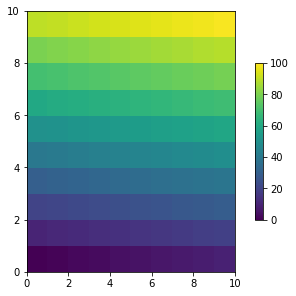

In [4]:
arr = np.arange(100).reshape((10, 10))
norm = mcolors.Normalize(vmin=0., vmax=100.)
# see note above: this makes all pcolormesh calls consistent:
pc_kwargs = {'rasterized': True, 'cmap': 'viridis', 'norm': norm}
fig, ax = plt.subplots(figsize=(4, 4), constrained_layout=True)
im = ax.pcolormesh(arr, **pc_kwargs)
fig.colorbar(im, ax=ax, shrink=0.6)

If you specify a list of axes (or other iterable container) to the
``ax`` argument of ``colorbar``, constrained_layout will take space from
the specified axes.



In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(4, 4), constrained_layout=True)
for ax in axs.flat:
    im = ax.pcolormesh(arr, **pc_kwargs)
fig.colorbar(im, ax=axs, shrink=0.6)

If you specify a list of axes from inside a grid of axes, the colorbar
will steal space appropriately, and leave a gap, but all subplots will
still be the same size.



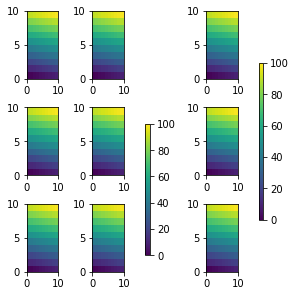

In [5]:
fig, axs = plt.subplots(3, 3, figsize=(4, 4), constrained_layout=True)
for ax in axs.flat:
    im = ax.pcolormesh(arr, **pc_kwargs)
fig.colorbar(im, ax=axs[1:, ][:, 1], shrink=0.8)
fig.colorbar(im, ax=axs[:, -1], shrink=0.6)

Note that there is a bit of a subtlety when specifying a single axes
as the parent.  In the following, it might be desirable and expected
for the colorbars to line up, but they don't because the colorbar paired
with the bottom axes is tied to the subplotspec of the axes, and hence
shrinks when the gridspec-level colorbar is added.



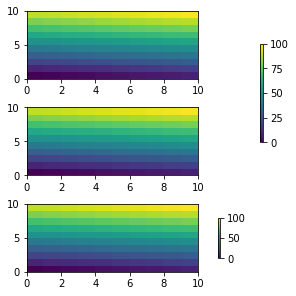

In [6]:
fig, axs = plt.subplots(3, 1, figsize=(4, 4), constrained_layout=True)
for ax in axs[:2]:
    im = ax.pcolormesh(arr, **pc_kwargs)
fig.colorbar(im, ax=axs[:2], shrink=0.6)
im = axs[2].pcolormesh(arr, **pc_kwargs)
fig.colorbar(im, ax=axs[2], shrink=0.6)

The API to make a single-axes behave like a list of axes is to specify
it as a list (or other iterable container), as below:



In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(4, 4), constrained_layout=True)
for ax in axs[:2]:
    im = ax.pcolormesh(arr, **pc_kwargs)
fig.colorbar(im, ax=axs[:2], shrink=0.6)
im = axs[2].pcolormesh(arr, **pc_kwargs)
fig.colorbar(im, ax=[axs[2]], shrink=0.6)

Suptitle
=========

``constrained_layout`` can also make room for `~.figure.Figure.suptitle`.



In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(4, 4), constrained_layout=True)
for ax in axs.flat:
    im = ax.pcolormesh(arr, **pc_kwargs)
fig.colorbar(im, ax=axs, shrink=0.6)
fig.suptitle('Big Suptitle')

Legends
=======

Legends can be placed outside of their parent axis.
Constrained-layout is designed to handle this for :meth:`.Axes.legend`.
However, constrained-layout does *not* handle legends being created via
:meth:`.Figure.legend` (yet).



In [ ]:
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(np.arange(10), label='This is a plot')
ax.legend(loc='center left', bbox_to_anchor=(0.8, 0.5))

However, this will steal space from a subplot layout:



In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(4, 2), constrained_layout=True)
axs[0].plot(np.arange(10))
axs[1].plot(np.arange(10), label='This is a plot')
axs[1].legend(loc='center left', bbox_to_anchor=(0.8, 0.5))

In order for a legend or other artist to *not* steal space
from the subplot layout, we can ``leg.set_in_layout(False)``.
Of course this can mean the legend ends up
cropped, but can be useful if the plot is subsequently called
with ``fig.savefig('outname.png', bbox_inches='tight')``.  Note,
however, that the legend's ``get_in_layout`` status will have to be
toggled again to make the saved file work, and we must manually
trigger a draw if we want constrained_layout to adjust the size
of the axes before printing.



In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(4, 2), constrained_layout=True)

axs[0].plot(np.arange(10))
axs[1].plot(np.arange(10), label='This is a plot')
leg = axs[1].legend(loc='center left', bbox_to_anchor=(0.8, 0.5))
leg.set_in_layout(False)
# trigger a draw so that constrained_layout is executed once
# before we turn it off when printing....
fig.canvas.draw()
# we want the legend included in the bbox_inches='tight' calcs.
leg.set_in_layout(True)
# we don't want the layout to change at this point.
fig.set_constrained_layout(False)
fig.savefig('CL01.png', bbox_inches='tight', dpi=100)

The saved file looks like:

![](/_static/constrained_layout/CL01.png)

   :align: center

A better way to get around this awkwardness is to simply
use the legend method provided by `.Figure.legend`:



In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(4, 2), constrained_layout=True)
axs[0].plot(np.arange(10))
lines = axs[1].plot(np.arange(10), label='This is a plot')
labels = [l.get_label() for l in lines]
leg = fig.legend(lines, labels, loc='center left',
                 bbox_to_anchor=(0.8, 0.5), bbox_transform=axs[1].transAxes)
fig.savefig('CL02.png', bbox_inches='tight', dpi=100)

The saved file looks like:

![](/_static/constrained_layout/CL02.png)

   :align: center




Padding and Spacing
===================

For constrained_layout, we have implemented a padding around the edge of
each axes.  This padding sets the distance from the edge of the plot,
and the minimum distance between adjacent plots.  It is specified in
inches by the keyword arguments ``w_pad`` and ``h_pad`` to the function
`~.figure.Figure.set_constrained_layout_pads`:



In [ ]:
fig, axs = plt.subplots(2, 2, constrained_layout=True)
for ax in axs.flat:
    example_plot(ax, nodec=True)
    ax.set_xticklabels('')
    ax.set_yticklabels('')
fig.set_constrained_layout_pads(w_pad=4./72., h_pad=4./72.,
        hspace=0., wspace=0.)

fig, axs = plt.subplots(2, 2, constrained_layout=True)
for ax in axs.flat:
    example_plot(ax, nodec=True)
    ax.set_xticklabels('')
    ax.set_yticklabels('')
fig.set_constrained_layout_pads(w_pad=2./72., h_pad=2./72.,
        hspace=0., wspace=0.)

Spacing between subplots is set by ``wspace`` and ``hspace``. There are
specified as a fraction of the size of the subplot group as a whole.
If the size of the figure is changed, then these spaces change in
proportion.  Note in the blow how the space at the edges doesn't change from
the above, but the space between subplots does.



In [ ]:
fig, axs = plt.subplots(2, 2, constrained_layout=True)
for ax in axs.flat:
    example_plot(ax, nodec=True)
    ax.set_xticklabels('')
    ax.set_yticklabels('')
fig.set_constrained_layout_pads(w_pad=2./72., h_pad=2./72.,
        hspace=0.2, wspace=0.2)

Spacing with colorbars
-----------------------

Colorbars will be placed ``wspace`` and ``hsapce`` apart from other
subplots. The padding between the colorbar and the axis it is
attached to will never be less than ``w_pad`` (for a vertical colorbar)
or ``h_pad`` (for a horizontal colorbar). Note the use of the ``pad`` kwarg
here in the ``colorbar`` call.  It defaults to 0.02 of the size
of the axis it is attached to.



In [ ]:
fig, axs = plt.subplots(2, 2, constrained_layout=True)
for ax in axs.flat:
    pc = ax.pcolormesh(arr, **pc_kwargs)
    fig.colorbar(pc, ax=ax, shrink=0.6, pad=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')
fig.set_constrained_layout_pads(w_pad=2./72., h_pad=2./72.,
        hspace=0.2, wspace=0.2)

In the above example, the colorbar will not ever be closer than 2 pts to
the plot, but if we want it a bit further away, we can specify its value
for ``pad`` to be non-zero.



In [ ]:
fig, axs = plt.subplots(2, 2, constrained_layout=True)
for ax in axs.flat:
    pc = ax.pcolormesh(arr, **pc_kwargs)
    fig.colorbar(im, ax=ax, shrink=0.6, pad=0.05)
    ax.set_xticklabels('')
    ax.set_yticklabels('')
fig.set_constrained_layout_pads(w_pad=2./72., h_pad=2./72.,
        hspace=0.2, wspace=0.2)

rcParams
========

There are five `rcParams<matplotlib-rcparams>` that can be set,
either in a script or in the `matplotlibrc` file.
They all have the prefix ``figure.constrained_layout``:

- ``use``: Whether to use constrained_layout. Default is False
- ``w_pad``, ``h_pad``:    Padding around axes objects.
   Float representing inches.  Default is 3./72. inches (3 pts)
- ``wspace``, ``hspace``:  Space between subplot groups.
   Float representing a fraction of the subplot widths being separated.
   Default is 0.02.



In [ ]:
plt.rcParams['figure.constrained_layout.use'] = True
fig, axs = plt.subplots(2, 2, figsize=(3, 3))
for ax in axs.flat:
    example_plot(ax)

Use with GridSpec
=================

constrained_layout is meant to be used
with :func:`~matplotlib.figure.Figure.subplots` or
:func:`~matplotlib.gridspec.GridSpec` and
:func:`~matplotlib.figure.Figure.add_subplot`.

Note that in what follows ``constrained_layout=True``



In [ ]:
fig = plt.figure()

gs1 = gridspec.GridSpec(2, 1, figure=fig)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

example_plot(ax1)
example_plot(ax2)

More complicated gridspec layouts are possible.  Note here we use the
convenience functions ``add_gridspec`` and ``subgridspec``.



In [ ]:
fig = plt.figure()

gs0 = fig.add_gridspec(1, 2)

gs1 = gs0[0].subgridspec(2, 1)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

example_plot(ax1)
example_plot(ax2)

gs2 = gs0[1].subgridspec(3, 1)

for ss in gs2:
    ax = fig.add_subplot(ss)
    example_plot(ax)
    ax.set_title("")
    ax.set_xlabel("")

ax.set_xlabel("x-label", fontsize=12)

Note that in the above the left and columns don't have the same vertical
extent.  If we want the top and bottom of the two grids to line up then
they need to be in the same gridspec:



In [ ]:
fig = plt.figure()

gs0 = fig.add_gridspec(6, 2)

ax1 = fig.add_subplot(gs0[:3, 0])
ax2 = fig.add_subplot(gs0[3:, 0])

example_plot(ax1)
example_plot(ax2)

ax = fig.add_subplot(gs0[0:2, 1])
example_plot(ax)
ax = fig.add_subplot(gs0[2:4, 1])
example_plot(ax)
ax = fig.add_subplot(gs0[4:, 1])
example_plot(ax)

This example uses two gridspecs to have the colorbar only pertain to
one set of pcolors.  Note how the left column is wider than the
two right-hand columns because of this.  Of course, if you wanted the
subplots to be the same size you only needed one gridspec.



In [ ]:
def docomplicated(suptitle=None):
    fig = plt.figure()
    gs0 = fig.add_gridspec(1, 2, figure=fig, width_ratios=[1., 2.])
    gsl = gs0[0].subgridspec(2, 1)
    gsr = gs0[1].subgridspec(2, 2)

    for gs in gsl:
        ax = fig.add_subplot(gs)
        example_plot(ax)
    axs = []
    for gs in gsr:
        ax = fig.add_subplot(gs)
        pcm = ax.pcolormesh(arr, **pc_kwargs)
        ax.set_xlabel('x-label')
        ax.set_ylabel('y-label')
        ax.set_title('title')

        axs += [ax]
    fig.colorbar(pcm, ax=axs)
    if suptitle is not None:
        fig.suptitle(suptitle)

docomplicated()

Manually setting axes positions
================================

There can be good reasons to manually set an axes position.  A manual call
to `~.axes.Axes.set_position` will set the axes so constrained_layout has
no effect on it anymore. (Note that constrained_layout still leaves the
space for the axes that is moved).



In [ ]:
fig, axs = plt.subplots(1, 2)
example_plot(axs[0], fontsize=12)
axs[1].set_position([0.2, 0.2, 0.4, 0.4])

If you want an inset axes in data-space, you need to manually execute the
layout using ``fig.execute_constrained_layout()`` call.  The inset figure
will then be properly positioned.  However, it will not be properly
positioned if the size of the figure is subsequently changed.  Similarly,
if the figure is printed to another backend, there may be slight changes
of location due to small differences in how the backends render fonts.



In [ ]:
from matplotlib.transforms import Bbox

fig, axs = plt.subplots(1, 2)
example_plot(axs[0], fontsize=12)
fig.execute_constrained_layout()
# put into data-space:
bb_data_ax2 = Bbox.from_bounds(0.5, 1., 0.2, 0.4)
disp_coords = axs[0].transData.transform(bb_data_ax2)
fig_coords_ax2 = fig.transFigure.inverted().transform(disp_coords)
bb_ax2 = Bbox(fig_coords_ax2)
ax2 = fig.add_axes(bb_ax2)

Manually turning off ``constrained_layout``
===========================================

``constrained_layout`` usually adjusts the axes positions on each draw
of the figure.  If you want to get the spacing provided by
``constrained_layout`` but not have it update, then do the initial
draw and then call ``fig.set_constrained_layout(False)``.
This is potentially useful for animations where the tick labels may
change length.

Note that ``constrained_layout`` is turned off for ``ZOOM`` and ``PAN``
GUI events for the backends that use the toolbar.  This prevents the
axes from changing position during zooming and panning.


Limitations
========================

Incompatible functions
----------------------

``constrained_layout`` will not work on subplots
created via the `subplot` command.  The reason is that each of these
commands creates a separate `GridSpec` instance and ``constrained_layout``
uses (nested) gridspecs to carry out the layout.  So the following fails
to yield a nice layout:



In [ ]:
fig = plt.figure()

ax1 = plt.subplot(221)
ax2 = plt.subplot(223)
ax3 = plt.subplot(122)

example_plot(ax1)
example_plot(ax2)
example_plot(ax3)

Of course that layout is possible using a gridspec:



In [ ]:
fig = plt.figure()
gs = fig.add_gridspec(2, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])

example_plot(ax1)
example_plot(ax2)
example_plot(ax3)

Similarly,
:func:`~matplotlib.pyplot.subplot2grid` doesn't work for the same reason:
each call creates a different parent gridspec.



In [ ]:
fig = plt.figure()

ax1 = plt.subplot2grid((3, 3), (0, 0))
ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)

example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)

The way to make this plot compatible with ``constrained_layout`` is again
to use ``gridspec`` directly



In [ ]:
fig = plt.figure()
gs = fig.add_gridspec(3, 3)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])
ax3 = fig.add_subplot(gs[1:, 0:2])
ax4 = fig.add_subplot(gs[1:, -1])

example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)

Other Caveats
-------------

* ``constrained_layout`` only considers ticklabels, axis labels, titles, and
  legends.  Thus, other artists may be clipped and also may overlap.

* It assumes that the extra space needed for ticklabels, axis labels,
  and titles is independent of original location of axes. This is
  often true, but there are rare cases where it is not.

* There are small differences in how the backends handle rendering fonts,
  so the results will not be pixel-identical.



Debugging
=========

Constrained-layout can fail in somewhat unexpected ways.  Because it uses
a constraint solver the solver can find solutions that are mathematically
correct, but that aren't at all what the user wants.  The usual failure
mode is for all sizes to collapse to their smallest allowable value. If
this happens, it is for one of two reasons:

1. There was not enough room for the elements you were requesting to draw.
2. There is a bug - in which case open an issue at
   https://github.com/matplotlib/matplotlib/issues.

If there is a bug, please report with a self-contained example that does
not require outside data or dependencies (other than numpy).



Notes on the algorithm
======================

The algorithm for the constraint is relatively straightforward, but
has some complexity due to the complex ways we can layout a figure.

Figure layout
-------------

Figures are laid out in a hierarchy:

1. Figure: ``fig = plt.figure()``

  a. Gridspec ``gs0 = gridspec.GridSpec(1, 2, figure=fig)``

      i. Subplotspec: ``ss = gs[0, 0]``

         1. Axes: ``ax0 = fig.add_subplot(ss)``

      ii. Subplotspec: ``ss = gs[0, 1]``

         1. Gridspec: ``gsR = gridspec.GridSpecFromSubplotSpec(2, 1, ss)``

            - Subplotspec: ``ss = gsR[0, 0]``

               - Axes: ``axR0 = fig.add_subplot(ss)``

            - Subplotspec: ``ss = gsR[1, 0]``

               - Axes: ``axR1 = fig.add_subplot(ss)``

Each item has a layoutbox associated with it. The nesting of gridspecs
created with `.GridSpecFromSubplotSpec` can be arbitrarily deep.

Each `~matplotlib.axes.Axes` has *two* layoutboxes.  The first one,
``ax._layoutbox`` represents the outside of the Axes and all its
decorations (i.e. ticklabels,axis labels, etc.).
The second layoutbox corresponds to the Axes' ``ax.position``, which sets
where in the figure the spines are placed.

Why so many stacked containers?  Ideally, all that would be needed are the
Axes layout boxes. For the Gridspec case, a container is
needed if the Gridspec is nested via `.GridSpecFromSubplotSpec`.  At the
top level, it is desirable for symmetry, but it also makes room for
`~.Figure.suptitle`.

For the Subplotspec/Axes case, Axes often have colorbars or other
annotations that need to be packaged inside the Subplotspec, hence the
need for the outer layer.


Simple case: one Axes
---------------------

For a single Axes the layout is straight forward.  The Figure and
outer Gridspec layoutboxes coincide.  The Subplotspec and Axes
boxes also coincide because the Axes has no colorbar.  Note
the difference between the red ``pos`` box and the green ``ax`` box
is set by the size of the decorations around the Axes.

In the code, this is accomplished by the entries in
``do_constrained_layout()`` like::

    ax._poslayoutbox.edit_left_margin_min(-bbox.x0 + pos.x0 + w_padt)




In [ ]:
from matplotlib._layoutbox import plot_children

fig, ax = plt.subplots(constrained_layout=True)
example_plot(ax, fontsize=24)
plot_children(fig, fig._layoutbox, printit=False)

Simple case: two Axes
---------------------
For this case, the Axes layoutboxes and the Subplotspec boxes still
co-incide.  However, because the decorations in the right-hand plot are so
much smaller than the left-hand, so the right-hand layoutboxes are smaller.

The Subplotspec boxes are laid out in the code in the subroutine
``arange_subplotspecs()``, which simply checks the subplotspecs in the code
against one another and stacks them appropriately.

The two ``pos`` axes are lined up.  Because they have the same
minimum row, they are lined up at the top. Because
they have the same maximum row they are lined up at the bottom.  In the
code this is accomplished via the calls to ``layoutbox.align``.  If
there was more than one row, then the same horizontal alignment would
occur between the rows.

The two ``pos`` axes are given the same width because the subplotspecs
occupy the same number of columns.  This is accomplished in the code where
``dcols0`` is compared to ``dcolsC``.  If they are equal, then their widths
are constrained to be equal.

While it is a bit subtle in this case, note that the division between the
Subplotspecs is *not* centered, but has been moved to the right to make
space for the larger labels on the left-hand plot.



In [ ]:
fig, ax = plt.subplots(1, 2, constrained_layout=True)
example_plot(ax[0], fontsize=32)
example_plot(ax[1], fontsize=8)
plot_children(fig, fig._layoutbox, printit=False)

Two Axes and colorbar
---------------------

Adding a colorbar makes it clear why the Subplotspec layoutboxes must
be different from the axes layoutboxes.  Here we see the left-hand
subplotspec has more room to accommodate the `~.Figure.colorbar`, and
that there are two green ``ax`` boxes inside the ``ss`` box.

Note that the width of the ``pos`` boxes is still the same because of the
constraint on their widths because their subplotspecs occupy the same
number of columns (one in this example).

The colorbar layout logic is contained in `~matplotlib.colorbar.make_axes`
which calls ``_constrained_layout.layoutcolorbarsingle()``
for cbars attached to a single axes, and
``_constrained_layout.layoutcolorbargridspec()`` if the colorbar is
associated with a gridspec.



In [ ]:
fig, ax = plt.subplots(1, 2, constrained_layout=True)
im = ax[0].pcolormesh(arr, **pc_kwargs)
fig.colorbar(im, ax=ax[0], shrink=0.6)
im = ax[1].pcolormesh(arr, **pc_kwargs)
plot_children(fig, fig._layoutbox, printit=False)

Colorbar associated with a Gridspec
-----------------------------------

This example shows the Subplotspec layoutboxes being made smaller by
a colorbar layoutbox.  The size of the colorbar layoutbox is
set to be ``shrink`` smaller than the vertical extent of the ``pos``
layoutboxes in the gridspec, and it is made to be centered between
those two points.



In [ ]:
fig, axs = plt.subplots(2, 2, constrained_layout=True)
for ax in axs.flat:
    im = ax.pcolormesh(arr, **pc_kwargs)
fig.colorbar(im, ax=axs, shrink=0.6)
plot_children(fig, fig._layoutbox, printit=False)

Uneven sized Axes
-----------------

There are two ways to make axes have an uneven size in a
Gridspec layout, either by specifying them to cross Gridspecs rows
or columns, or by specifying width and height ratios.

The first method is used here.  The constraint that makes the heights
be correct is in the code where ``drowsC < drows0`` which in
this case would be 1 is less than 2.  So we constrain the
height of the 1-row Axes to be less than half the height of the
2-row Axes.

<div class="alert alert-info"><h4>Note</h4><p>This algorithm can be wrong if the decorations attached to the smaller
   axes are very large, so there is an unaccounted-for edge case.</p></div>



In [ ]:
fig = plt.figure(constrained_layout=True)
gs = gridspec.GridSpec(2, 2, figure=fig)
ax = fig.add_subplot(gs[:, 0])
im = ax.pcolormesh(arr, **pc_kwargs)
ax = fig.add_subplot(gs[0, 1])
im = ax.pcolormesh(arr, **pc_kwargs)
ax = fig.add_subplot(gs[1, 1])
im = ax.pcolormesh(arr, **pc_kwargs)
plot_children(fig, fig._layoutbox, printit=False)

Height and width ratios are accommodated with the same part of
the code with the smaller axes always constrained to be less in size
than the larger.



In [ ]:
fig = plt.figure(constrained_layout=True)
gs = gridspec.GridSpec(3, 2, figure=fig,
    height_ratios=[1., 0.5, 1.5],
    width_ratios=[1.2, 0.8])
ax = fig.add_subplot(gs[:2, 0])
im = ax.pcolormesh(arr, **pc_kwargs)
ax = fig.add_subplot(gs[2, 0])
im = ax.pcolormesh(arr, **pc_kwargs)
ax = fig.add_subplot(gs[0, 1])
im = ax.pcolormesh(arr, **pc_kwargs)
ax = fig.add_subplot(gs[1:, 1])
im = ax.pcolormesh(arr, **pc_kwargs)
plot_children(fig, fig._layoutbox, printit=False)

Empty gridspec slots
--------------------

The final piece of the code that has not been explained is what happens if
there is an empty gridspec opening.  In that case a fake invisible axes is
added and we proceed as before.  The empty gridspec has no decorations, but
the axes position in made the same size as the occupied Axes positions.

This is done at the start of
``_constrained_layout.do_constrained_layout()`` (``hassubplotspec``).



In [ ]:
fig = plt.figure(constrained_layout=True)
gs = gridspec.GridSpec(1, 3, figure=fig)
ax = fig.add_subplot(gs[0])
im = ax.pcolormesh(arr, **pc_kwargs)
ax = fig.add_subplot(gs[-1])
im = ax.pcolormesh(arr, **pc_kwargs)
plot_children(fig, fig._layoutbox, printit=False)
plt.show()

Other notes
-----------

The layout is called only once.  This is OK if the original layout was
pretty close (which it should be in most cases).  However, if the layout
changes a lot from the default layout then the decorators can change size.
In particular the x and ytick labels can change.  If this happens, then
we should probably call the whole routine twice.

